In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import constants
import Plotting as pl
import matplotlib.colors as colors

styleDict={'axes.facecolor': '#000000',
 'axes.edgecolor': '#FFFFFF',
 'axes.grid': True,
 'axes.labelcolor': '#FFFFFF',
 'figure.facecolor': '#000000',
 'grid.color': '#b0b0b0',
 'text.color': '#FFFFFF',
 'xtick.color': '#FFFFFF',
 'ytick.color': '#FFFFFF',
 'patch.edgecolor': '#FFFFFF',
}
sns.set_style(rc=styleDict)

In [14]:
dfhc=pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, constants.species, singleDf=True)
dfsh=pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, constants.species, singleDf=True)

hcdf=pl.boxplotDF(dfhc, constants.species, constants.physical, constants.HOTCORE)
shdf=pl.boxplotDF(dfsh, constants.species, constants.physical, constants.SHOCK)

In [15]:
dfDic={constants.HOTCORE: dfhc, constants.SHOCK: dfsh}
dfDicBox={constants.HOTCORE: hcdf, constants.SHOCK: shdf}

propColor={
    constants.COSMICRAY: ['#cc1470','#004733'],
    constants.IDENS: ['#f9393c','#90be6d','#624488'],
    constants.INTERSTELLARRAD: ['#46af8f','#4d194d'],
    constants.SHOCKVEL:['#f9844a','#f9c74f','#277da1'],
    constants.FTEMP:['#f9844a','#f9c74f','#277da1']
}

propOrder={
    constants.HOTCORE: 
    {constants.FTEMP: ['50.0', '100.0', '300.0'],
    constants.COSMICRAY: ['10.0', '1000.0'],
    constants.INTERSTELLARRAD: [ '3.0', '1000.0'],
    constants.IDENS: ['1000000.0', '10000000.0', '100000000.0']},
    constants.SHOCK: 
    {constants.SHOCKVEL: ['10.0', '25.0', '40.0'],
    constants.COSMICRAY: ['10.0', '1000.0'],
    constants.INTERSTELLARRAD: [ '3.0', '1000.0'],
    constants.IDENS: ['1000.0', '10000.0', '100000.0']}
    }

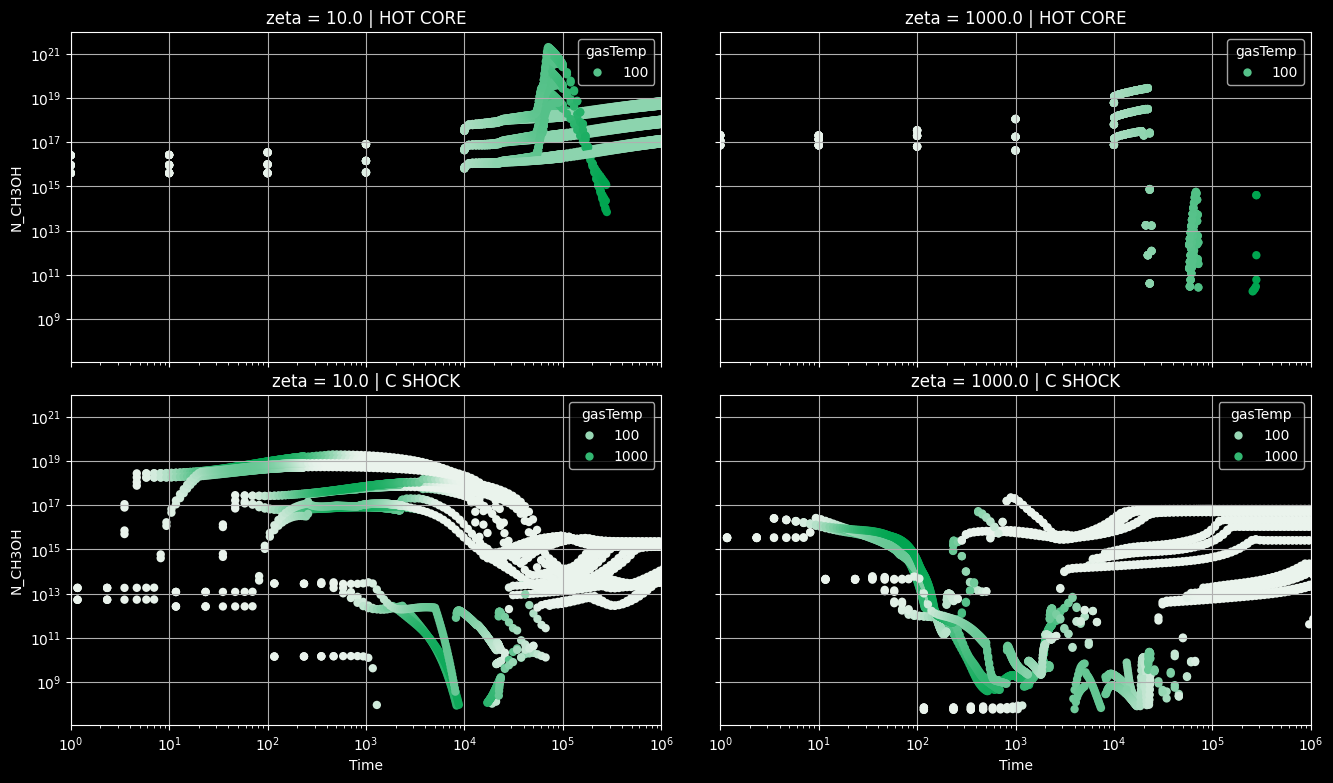

In [39]:
fig, axs = plt.subplots(2,2, figsize=(16,9), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for tipo, df in dfDic.items():
    i = 0 if tipo == constants.HOTCORE else 1
    for j, zeta in enumerate([10.0,1000.0]):
        ax=axs[i][j]
        sns.scatterplot(data=df[df['zeta']==zeta], x='Time', y='N_CH3OH',
                        hue='gasTemp', palette=sns.light_palette('#00A550', as_cmap=True),
                        hue_norm=colors.LogNorm(vmin=df['gasTemp'].min(), vmax=df['gasTemp'].max()),
                        linewidth=0, ax=ax)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xbound(1e0,1e6)
        ax.set_title(f"zeta = {zeta} | {tipo.upper()}")

# Box Plots

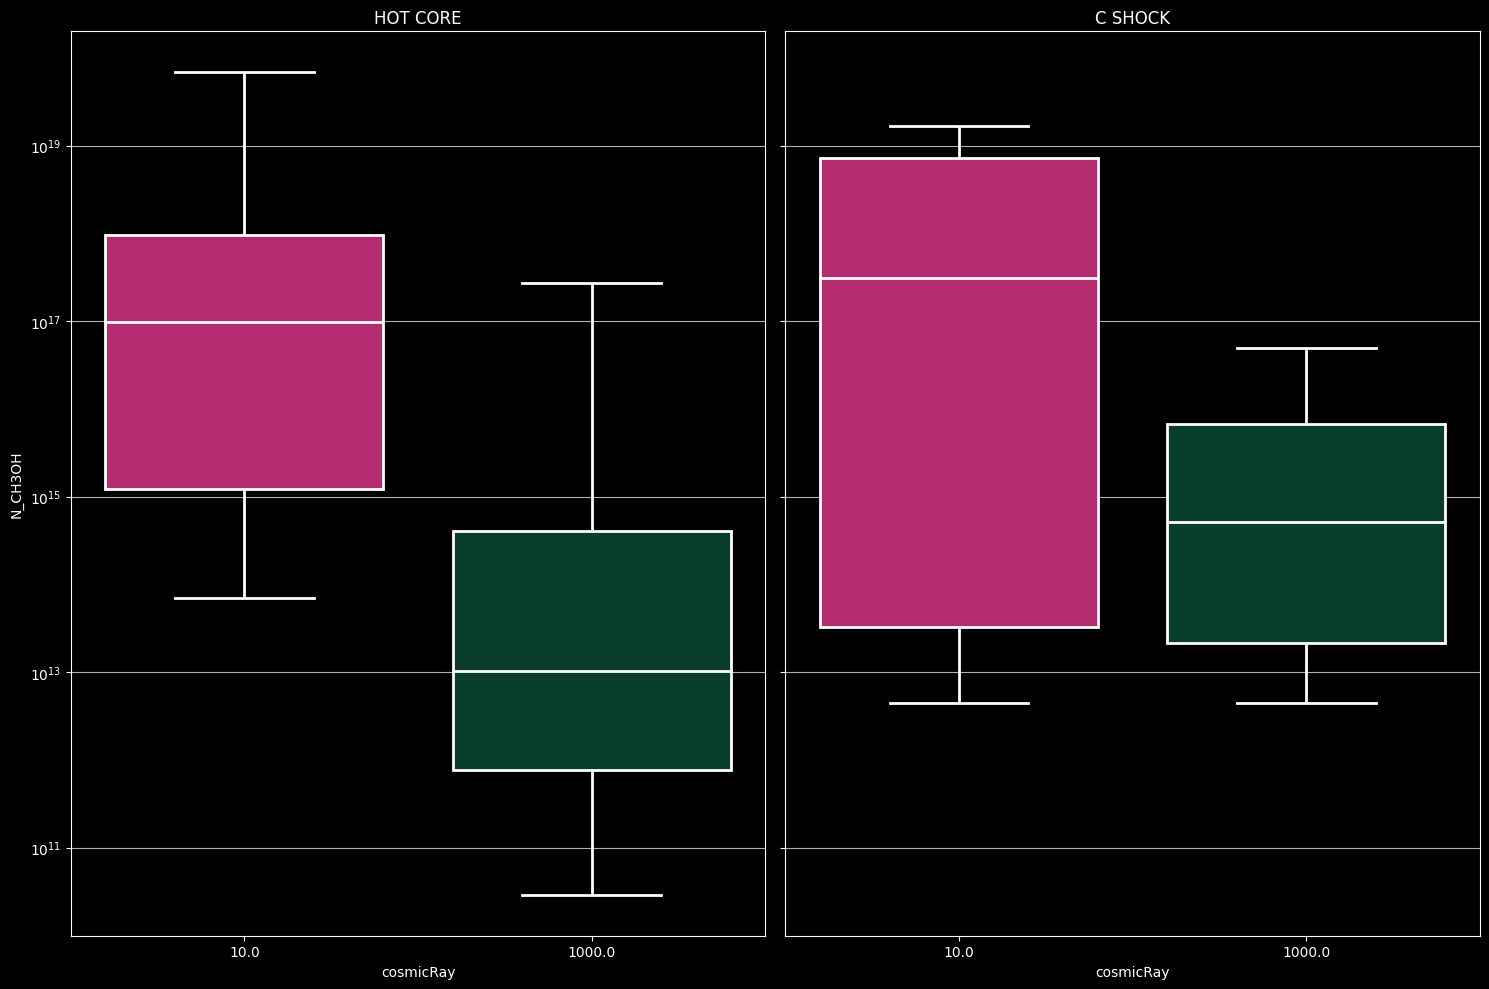

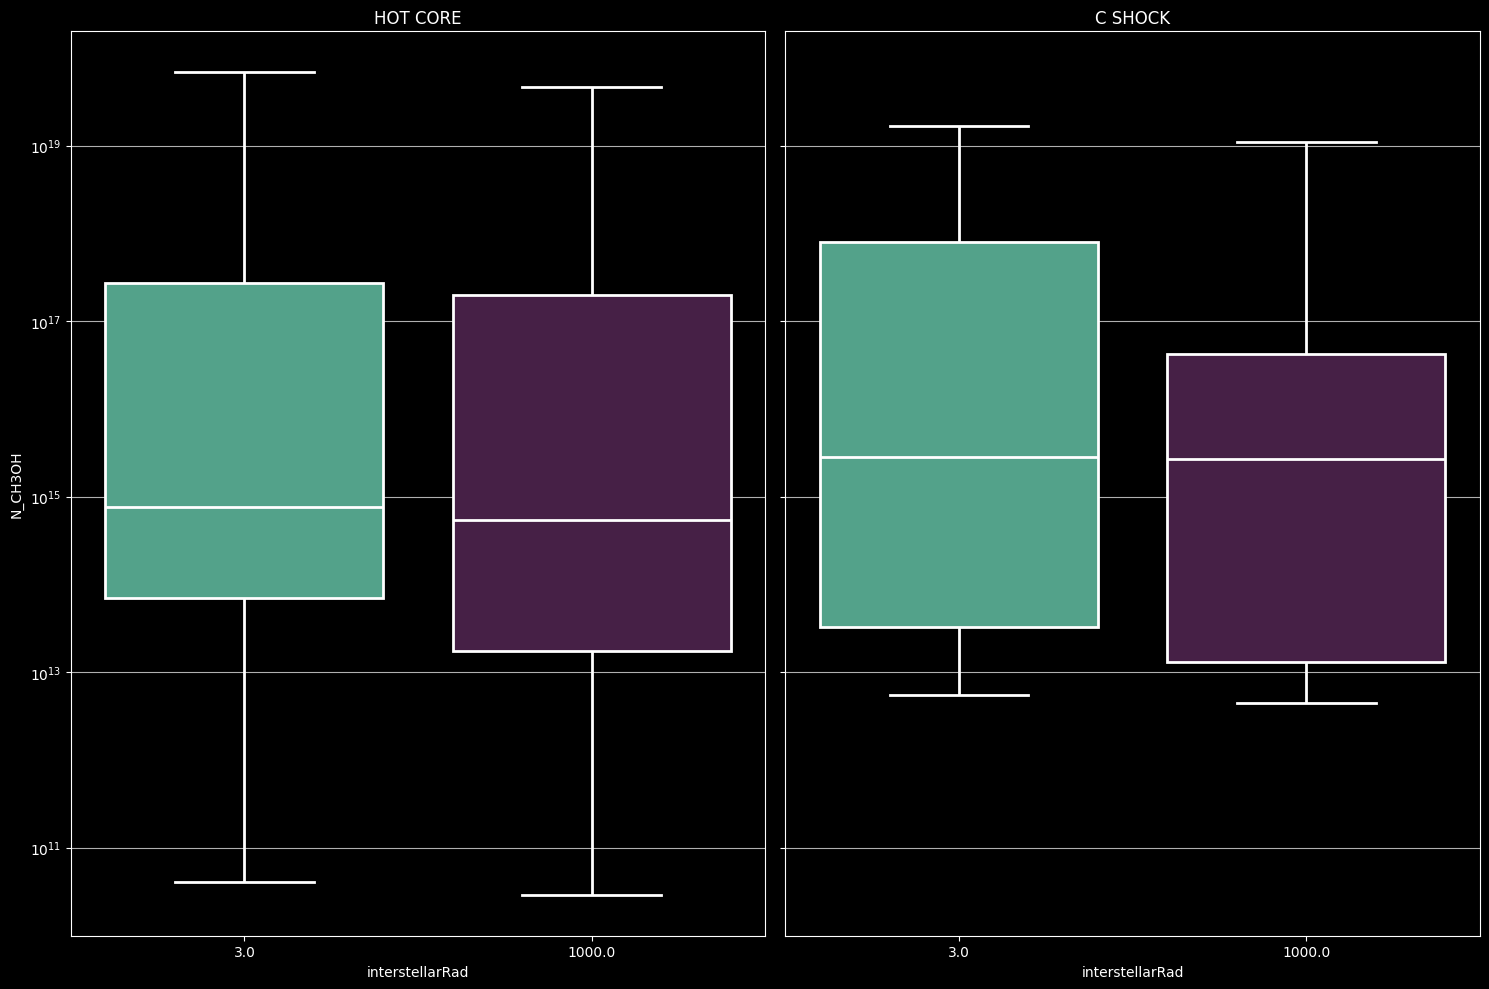

In [56]:
for enfasis in [constants.COSMICRAY, constants.INTERSTELLARRAD]:
    fig, axs = plt.subplots(1,2, figsize=(15,10), layout='tight', sharey=True)
    for i, tipo in enumerate(dfDicBox.keys()):
        sns.boxplot(data=dfDicBox[tipo], x=enfasis,
                    hue=enfasis, legend=None,
                    palette=propColor[enfasis], hue_order=propOrder[tipo][enfasis],
                    order=propOrder[tipo][enfasis],
                    linecolor='white', linewidth=2,
                    y='N_CH3OH', ax=axs[i], log_scale=True)
        axs[i].set_title(tipo.upper())
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{enfasis.upper()}.png")
    # plt.close()

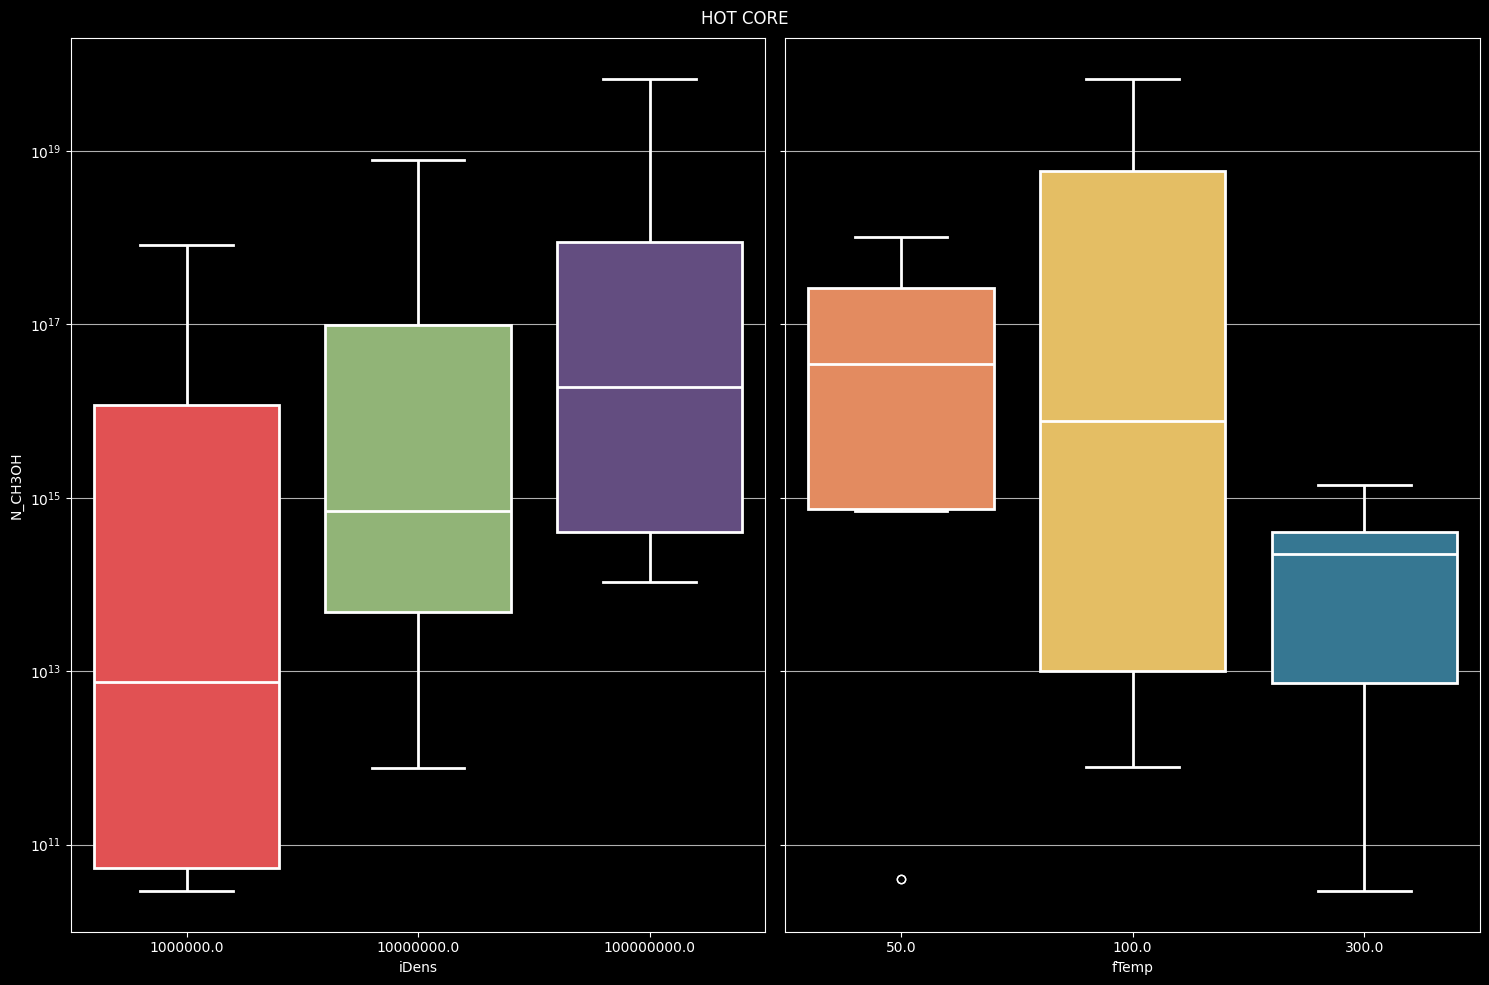

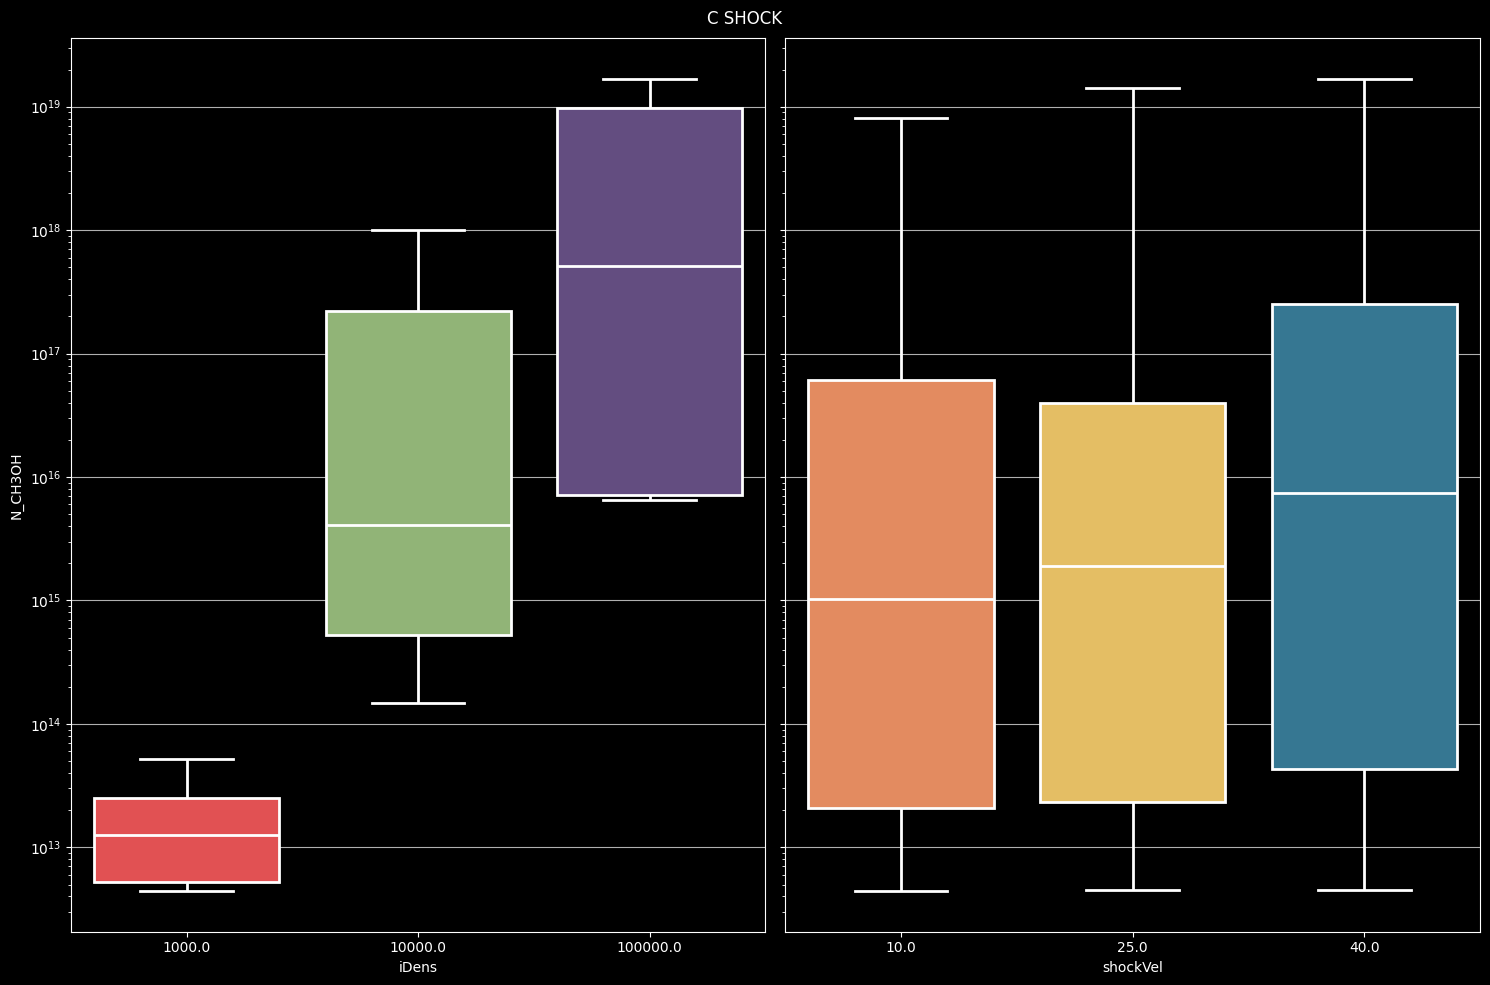

In [57]:
for tipo in dfDicBox.keys():
    fig, axs = plt.subplots(1,2, figsize=(15,10), layout='tight', sharey=True)
    df=dfDicBox[tipo]
    varparam=constants.FTEMP if tipo==constants.HOTCORE else constants.SHOCKVEL
    for i, enfasis in enumerate([constants.IDENS, varparam]):
        sns.boxplot(data=df, x=enfasis,
                    hue=enfasis, legend=None,
                    palette=propColor[enfasis], hue_order=propOrder[tipo][enfasis],
                    order=propOrder[tipo][enfasis],
                    linecolor='white', linewidth=2,
                    y='N_CH3OH', ax=axs[i], log_scale=True)
    fig.suptitle(tipo.upper())
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{enfasis.upper()}.png")
    # plt.close()